<a href="https://colab.research.google.com/github/TheGooseGuy/Insurance-Regression-Kaggle/blob/main/Kaggle_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.4f}'.format

In [119]:
from google.colab import drive
drive.mount('/content/drive')

from pandas import read_csv
train_data = read_csv('/content/drive/MyDrive/Kaggle/train.csv')
test_data = read_csv('/content/drive/MyDrive/Kaggle/test.csv')

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis (EDA)

In [120]:
print(train_data.shape)
print(test_data.shape)

(1200000, 21)
(800000, 20)


In [121]:
print(train_data.head(5))

   id     Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0 19.0000  Female    10,049.0000        Married                1.0000   
1   1 39.0000  Female    31,678.0000       Divorced                3.0000   
2   2 23.0000    Male    25,602.0000       Divorced                3.0000   
3   3 21.0000    Male   141,855.0000        Married                2.0000   
4   4 21.0000    Male    39,651.0000         Single                1.0000   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed       22.5988     Urban  ...          2.0000   
1        Master's            NaN       15.5697     Rural  ...          1.0000   
2     High School  Self-Employed       47.1775  Suburban  ...          1.0000   
3      Bachelor's            NaN       10.9381     Rural  ...          1.0000   
4      Bachelor's  Self-Employed       20.3761     Rural  ...          0.0000   

   Vehicle Age  Credit Score  Insurance Duration  

In [122]:
# Check the data type of each column
print(train_data.dtypes)
print("")
print(test_data.dtypes)

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 

In [123]:
# combine datasets for EDA and later pre-processing
train_data['isTrain'] = 1
test_data['isTrain'] = 0
combined_data = pd.concat([train_data, test_data], axis=0)

In [124]:
for column in combined_data.columns:
    dtype = combined_data[column].dtype
    print(f"Column: {column}")

    if pd.api.types.is_numeric_dtype(dtype):  # Check if column is numeric
        print("Distribution (Numerical):")
        print(combined_data[column].describe())  # Summary statistics
        print()
    elif pd.api.types.is_object_dtype(dtype):  # Check if column is object (categorical-like)
        print("Category Counts (Object):")
        print(combined_data[column].value_counts())  # Count unique values
        print()
    elif pd.api.types.is_datetime64_any_dtype(dtype):  # Handle datetime columns if needed
        print("Unique Dates:")
        print(combined_data[column].value_counts())  # Count occurrences of each date
        print()
    else:
        print("Unhandled Data Type")
        print()

Column: id
Distribution (Numerical):
count   2,000,000.0000
mean      999,999.5000
std       577,350.4135
min             0.0000
25%       499,999.7500
50%       999,999.5000
75%     1,499,999.2500
max     1,999,999.0000
Name: id, dtype: float64

Column: Age
Distribution (Numerical):
count   1,968,806.0000
mean           41.1419
std            13.5391
min            18.0000
25%            30.0000
50%            41.0000
75%            53.0000
max            64.0000
Name: Age, dtype: float64

Column: Gender
Category Counts (Object):
Gender
Male      1003660
Female     996340
Name: count, dtype: int64

Column: Annual Income
Distribution (Numerical):
count   1,925,191.0000
mean       32,768.6812
std        32,188.1361
min             1.0000
25%         8,021.0000
50%        23,957.0000
75%        44,641.0000
max       149,997.0000
Name: Annual Income, dtype: float64

Column: Marital Status
Category Counts (Object):
Marital Status
Single      659096
Married     656488
Divorced    653551
Nam

# Pre-Processing

In [125]:
# Check the NaN values and count them
for column in combined_data:
    na_count = combined_data[column].isna().sum()  # Count NaN values
    if na_count > 0:
        print(f"Column '{column}' contains {na_count} NaN values")

Column 'Age' contains 31194 NaN values
Column 'Annual Income' contains 74809 NaN values
Column 'Marital Status' contains 30865 NaN values
Column 'Number of Dependents' contains 182802 NaN values
Column 'Occupation' contains 597200 NaN values
Column 'Health Score' contains 123525 NaN values
Column 'Previous Claims' contains 606831 NaN values
Column 'Vehicle Age' contains 9 NaN values
Column 'Credit Score' contains 229333 NaN values
Column 'Insurance Duration' contains 3 NaN values
Column 'Customer Feedback' contains 130100 NaN values
Column 'Premium Amount' contains 800000 NaN values


In [126]:
# Rename columns to lowercase
combined_data.columns = combined_data.columns.str.lower()

In [127]:
# Age

# A few ways to deal with missing values
# consider replace them with mean, median, mode, or use a model (regression, KNN) to predict missing values

combined_data['age'] = combined_data['age'].fillna(combined_data['age'].mean()) # Replace NA with mean value

In [128]:
# Gender

# 'gender_Male'
combined_data = pd.get_dummies(combined_data, columns=['gender'], drop_first=True)

In [129]:
# Annual Income
combined_data['annual income'] = combined_data['annual income'].fillna(combined_data['annual income'].mean())
print(combined_data['annual income'].describe())

# Can also replace the 0.05 quantile with a specific value
# combined_data['annual income'].quantile(0.05)

count   2,000,000.0000
mean       32,768.6812
std        31,580.4081
min             1.0000
25%         8,662.0000
50%        24,996.0000
75%        43,940.0000
max       149,997.0000
Name: annual income, dtype: float64


In [130]:
# Marital Status

# Fill NaN values with mode, which is "single"
combined_data['marital status'] = combined_data['marital status'].fillna(combined_data['marital status'].mode()[0])

# 'marital status_Married', 'marital status_Single'
combined_data = pd.get_dummies(combined_data, columns=['marital status'], drop_first=True)

In [131]:
# Number of Dependents

# Fill NaN values with mean, which is 2
combined_data['number of dependents'] = combined_data['number of dependents'].fillna(int(combined_data['number of dependents'].mean()))

In [132]:
# Education Level

# 'education level_High School', 'education level_Master's', 'education level_PhD'
combined_data = pd.get_dummies(combined_data, columns=['education level'], drop_first=True)

In [133]:
# Occupation

# Column: Occupation
# Category Counts (Object):
# Occupation
# Employed         471324
# Self-Employed    470636
# Unemployed       460840
# Name: count, dtype: int64

# Considering that Occupation column is balanced, and it has 597200 NaN values,
# I chose to create a new category for it
combined_data['occupation'] = combined_data['occupation'].fillna('Unknown')

# 'occupation_Self-Employed', 'occupation_Unemployed', 'occupation_Unknown',
combined_data = pd.get_dummies(combined_data, columns=['occupation'], drop_first=True)

In [134]:
# Health Score

# Fill NaN values with mean, which is 25.6136
combined_data['health score'] = combined_data['health score'].fillna(combined_data['health score'].mean())

In [135]:
# Location

# 'location_Suburban', 'location_Urban'
combined_data = pd.get_dummies(combined_data, columns = ['location'], drop_first=True)

In [136]:
# Policy Type

# 'policy type_Comprehensive', 'policy type_Premium'
combined_data = pd.get_dummies(combined_data, columns = ['policy type'], drop_first=True)

In [137]:
# Previous Claims

# Replace NaN values with mean, which is 1
combined_data['previous claims'] = combined_data['previous claims'].fillna(int(combined_data['previous claims'].mean()))

In [138]:
# Vehicle Age

# Fill NaN values with mean, which is 9
combined_data['vehicle age'] = combined_data['vehicle age'].fillna(int(combined_data['vehicle age'].mean()))

In [139]:
# Credit Score

# Fill NaN values with mean, which is 592
combined_data['credit score'] = combined_data['credit score'].fillna(int(combined_data['credit score'].mean()))

In [140]:
# Insurance Duration
combined_data['insurance duration'] = combined_data['insurance duration'].fillna(combined_data['insurance duration'].mode()[0])

In [141]:
# Policy Start Date

# Convert the 'policy start date' column to datetime format
combined_data['policy start date'] = pd.to_datetime(combined_data['policy start date'])

combined_data['Year'] = combined_data['policy start date'].dt.year
combined_data['Month'] = combined_data['policy start date'].dt.month

combined_data = combined_data.drop('policy start date', axis=1)

In [142]:
# Customer Feedback

combined_data['customer feedback'] = combined_data['customer feedback'].fillna('Unknown')
# 'customer feedback_Good', 'customer feedback_Poor', 'customer feedback_Unknown'
combined_data = pd.get_dummies(combined_data, columns=['customer feedback'], drop_first=True)

In [143]:
# Smoking Status

# 'smoking status_Yes'
combined_data = pd.get_dummies(combined_data, columns=['smoking status'], drop_first=True)

In [144]:
# Exercise Frequency

# 'exercise frequency_Monthly', 'exercise frequency_Rarely', 'exercise frequency_Weekly'
combined_data = pd.get_dummies(combined_data, columns=['exercise frequency'], drop_first=True)

In [145]:
# Property Type

# 'property type_Condo', 'property type_House'
combined_data = pd.get_dummies(combined_data, columns=['property type'], drop_first=True)

In [146]:
# Convert all Boolean columns in the DataFrame to 1 and 0
combined_data[combined_data.select_dtypes(include=['bool']).columns] = combined_data.select_dtypes(include=['bool']).astype(int)

In [147]:
train_data = combined_data[combined_data['istrain'] == 1]
test_data = combined_data[combined_data['istrain'] == 0]

# Modelling

## Linear Regression

In [174]:
from sklearn.model_selection import train_test_split

X = train_data.drop(['premium amount', 'id'], axis=1)
y = train_data['premium amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [175]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

Root Train Mean Squared Error MSE: 0.9981
Train R-squared                  : 0.0037
Root Test Mean Squared Error MSE : 0.9938
Test R-squared                   : 0.0034


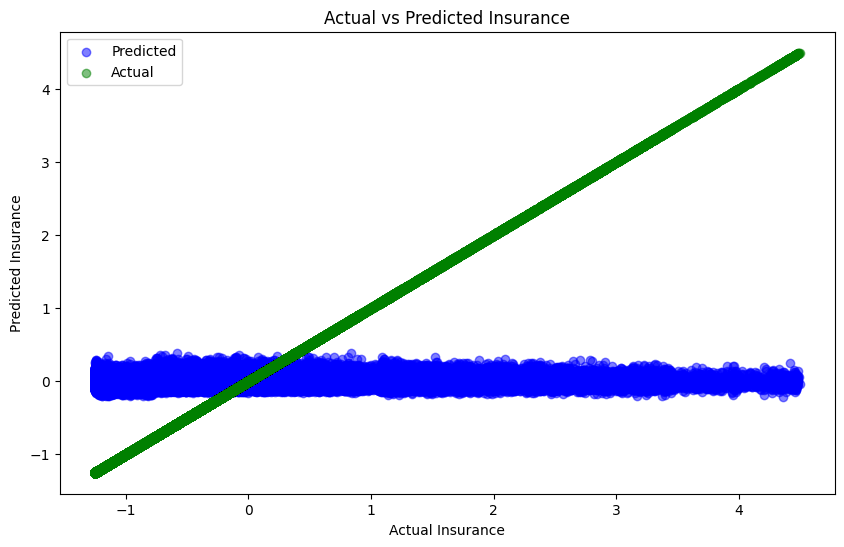

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import statsmodels.api as sm

# Initialize the model
model = sm.OLS(X_train, y_train)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Root Train Mean Squared Error MSE: {sqrt(train_mse):.4f}")
print(f"Train R-squared                  : {train_r2:.4f}")
print(f"Root Test Mean Squared Error MSE : {sqrt(test_mse):.4f}")
print(f"Test R-squared                   : {test_r2:.4f}")
# Plotting prediction line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual')
plt.xlabel('Actual Insurance')
plt.ylabel('Predicted Insurance')
plt.title('Actual vs Predicted Insurance')
plt.legend()
plt.show()

In [173]:
# using statsmodels
import statsmodels.api as sm


# ols model with intercept added to predictor
ols_sm = sm.OLS(y_train, sm.add_constant(X_train))

# fitted model and summary
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     115.2
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:27:42   Log-Likelihood:            -1.3603e+06
No. Observations:              960000   AIC:                         2.721e+06
Df Residuals:                  959967   BIC:                         2.721e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.814e-18      0.001  -5.71e-15      1.000      -0.002       0.002
x1            -0.0021      0.001     -2.088      0.037      -0.004      -0.000
x2            -0.0203      0.001    -19.528      0.000      -0.022      -0.018
x3            -0.0004      0.001     -0.436      0.663      -0.002       0.002
x4             0.0146      0.001     14.303      0.000       0.013       0.017
x5             0.0404      0.001     39.562      0.000       0.038       0.042
x6            -0.0001      0.001     -0.103      0.918      -0.002       0.002
x7            -0.0307      0.001    -29.597      0.000      -0.033      -0.029
x8         -4.392e-05      0.001     -0.043      0.966      -0.002       0.002
x9          1.924e-18   7.93e-19      2.427      0.015     3.7e-19    3.48e-18
x10            0.0002      0.001      0.154      0.877      -0.002       0.002
x11           -0.0006      0.001     -0.473      0.636      -0.003       0.002
x12            0.0034      0.001      2.854      0.004       0.001       0.006
x13            0.0008      0.001      0.625      0.532      -0.002       0.003
x14           -0.0007      0.001     -0.581      0.561      -0.003       0.002
x15           -0.0007      0.001     -0.592      0.554      -0.003       0.002
x16           -0.0002      0.001     -0.172      0.863      -0.003       0.002
x17           -0.0001      0.001     -0.114      0.909      -0.003       0.002
x18           -0.0073      0.001     -5.717      0.000      -0.010      -0.005
x19            0.0006      0.001      0.493      0.622      -0.002       0.003
x20            0.0011      0.001      0.933      0.351      -0.001       0.003
x21           -0.0012      0.001     -1.018      0.309      -0.004       0.001
x22           -0.0010      0.001     -0.817      0.414      -0.003       0.001
x23           -0.0105      0.001     -9.989      0.000      -0.013      -0.008
x24            0.0047      0.001      4.434      0.000       0.003       0.007
x25            0.0010      0.001      0.873      0.382      -0.001       0.003
x26            0.0029      0.001      2.440      0.015       0.001       0.005
x27            0.0298      0.001     27.542      0.000       0.028       0.032
x28           -0.0004      0.001     -0.406      0.685      -0.002       0.002
x29           -0.0002      0.001     -0.172      0.864      -0.003       0.002
x30           -0.0009      0.001     -0.685      0.493      -0.003       0.002
x31           -0.0008      0.001     -0.658      0.510      -0.003       0.002
x32           -0.0013      0.001     -1.132      0.258      -0.004       0.001
x33           -0.0017      0.001     -1.441      0.150      -0.004       0.001
==============================================================================
Omnibus:                   190501.381   Durbin-Watson:                   1.998
Pr

### Forward Selection

In [1]:


# Function to process a subset of features
def processSubset(feature_set, X, Y):
    model = sm.OLS(Y, sm.add_constant(X[list(feature_set)]))
    regr = model.fit()
    RSS = sum(regr.resid ** 2)
    return {'model': regr, 'RSS': RSS}

# Forward selection function
def forward(predictors, X, Y):
    remaining_predictors = [p for p in X.columns if p not in predictors]

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors + [p], X, Y))
    models = pd.DataFrame(results)

    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]

    return best_model

# Forward selection procedure
def forward_selection(X, Y):
    predictors = []
    models = []

    for i in range(len(X.columns)):
        best_model = forward(predictors, X, Y)
        predictors = best_model['model'].model.exog_names[1:]
        models.append(best_model)

        print(f"Step {i+1}: Selected predictors: {predictors}, RSS: {best_model['RSS']}")

    # Final selected model and predictors
    final_model = models[-1]['model']
    selected_predictors = models[-1]['model'].model.exog_names[1:]  # Get final list of predictors

    return final_model, selected_predictors


X = pd.DataFrame(X_train)
Y = pd.DataFrame(y_train)

# Run forward selection
final_model, selected_predictors = forward_selection(X, Y)

# Print final selected predictors
print("Final selected predictors: ", selected_predictors)

# Summary of the final model
print(final_model.summary())

NameError: name 'pd' is not defined